# 기본 개념
- tf.constant( value , dtype=None, shape = None, name="원하는 이름" ) -> 상수(고정된 값)을 갖게 하는 노드
- tf.Variable(<initial_value>,name="원하는 이름") -> 변수 생성해주는 역할
- tf.placeholder(dtype, shape=None, name=None) -> 비어있는 변수로 shape = None의 경우 모든 값을 다 받고 shape는 유동적
- 보통 placeholder의 shape의 경우 shape=[None, 열]된 경우가 많은데 행은 데이터의 개수 이므로 유동적이고 열은 데이터의 값이므로 고정
- sess = tf.Session() -> sess.run()의 경우 안에 있는 노드 값을 실행하는 역할을 하므로 실질적으로 모델을 작동하는 원리라고 보면 됨

# Linear Regression
- cost 값 구하는 공식: 1/m(H((x)-(y))<제곱>  // x와y는 1~m까지 m=최종갯수
- H(x) = Wx + b
- cost(W,b)  // W = m, b = b
- W -> 1에 수렴(가중치)
- b -> 0에 수렴(기울기)

# Linear Regression 구현예제

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_train = [1,2,3]
y_train = [1,2,3]

###### 랜덤하게 가중치와 y 값을 불러와 Variable(텐서 변환) 해주는 역할

In [3]:
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

###### 가중치(W)를 train_data(x_train)과 곱하고 b(y) 값을 더하여 가설을 세움
- hypothesis -> 실제로 나온 값 // cost -> 정답과 실제 나온 값을 비교하여 나온 오차

In [4]:
hypothesis = W*x_train+b

###### hypothesis(가중치)의 값에서 y_train(정답)을 뺀 후 제곱한 이후의 값의 평균을 cost로 만들어줌 -> 실질적으로 loss

In [5]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

###### optimizer 구하는 방법
- optimizer.minimize(cost)란 cost(loss) 값을 최소 값으로 만들어주고, 가중치(W)는 1에 수렴하게 만드는 과정

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

###### 최종 정리 
- W: 0에 수렴하므로 기울기는 점점 원만해짐
- b: 1에 수렴하므로 최적의 지점을 찾음

In [8]:
cost_val = []
W_val = []

In [9]:
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        cost_val.append(sess.run(cost))
        W_val.append(sess.run(W))
        print("step: {} \ncost: {} \nW: {} \nB: {}".format(step, sess.run(cost), sess.run(W), sess.run(b)))
        print("  ")

step: 0 
cost: 29.341211318969727 
W: [-0.835549] 
B: [-1.5341927]
  
step: 20 
cost: 0.31385231018066406 
W: [1.0549835] 
B: [-0.6683905]
  
step: 40 
cost: 0.046279992908239365 
W: [1.2242007] 
B: [-0.561403]
  
step: 60 
cost: 0.039867401123046875 
W: [1.2300228] 
B: [-0.52782285]
  
step: 80 
cost: 0.036188606172800064 
W: [1.2207704] 
B: [-0.5023319]
  
step: 100 
cost: 0.03286690264940262 
W: [1.2105433] 
B: [-0.4786589]
  
step: 120 
cost: 0.02985023520886898 
W: [1.2006626] 
B: [-0.4561575]
  
step: 140 
cost: 0.02711045742034912 
W: [1.1912335] 
B: [-0.43471926]
  
step: 160 
cost: 0.024622147902846336 
W: [1.1822462] 
B: [-0.41428894]
  
step: 180 
cost: 0.022362232208251953 
W: [1.1736815] 
B: [-0.39481884]
  
step: 200 
cost: 0.020309731364250183 
W: [1.1655191] 
B: [-0.37626383]
  
step: 220 
cost: 0.018445631489157677 
W: [1.1577402] 
B: [-0.35858077]
  
step: 240 
cost: 0.016752608120441437 
W: [1.1503271] 
B: [-0.34172884]
  
step: 260 
cost: 0.015215008519589901 
W: [1

###### cost(loss) 값이 0에 수렴하고 W 값은 1에 수렴할수록 정확도가 올라감

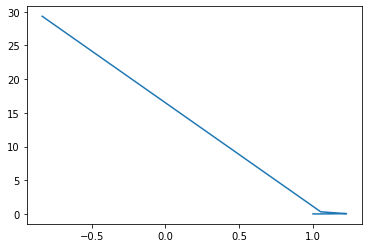

In [10]:
plt.plot(W_val, cost_val)
plt.show()

# Gradient denscent 알고리즘
- 경사하강법
- Minimize cost function
- 사용목적: 참고사이트(https://angeloyeo.github.io/2020/08/16/gradient_descent.html)
- 주의: step size의 크기 - 적절한 크기를 주는 게 중요
- 너무 작게 주면 기울기 폭이 좁아 적절한 기울기 소실을 가져올 수 없음
- 너무 크게 주면 기울기 폭이 넓어 기울기의 변동폭이 커져 기울기 대응이 불가

# COST  함수의 기울기

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

In [12]:
X = [1,2,3]
Y = [1,2,3]

In [13]:
W = tf.placeholder(tf.float32)

In [14]:
hypothesis = X * W

In [15]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
W_val = []
cost_val = []

###### 가중치(W)를 -30~50까지 주었을 때 학습하는 모습
- feed_w가 10분의 1의 수치를 갖기 때문에 가중치(W)는 약 -3.0 ~ 5.0의 값을 가짐
- linearning rate는 가중치(W) 값에서 linearning rate 값을 빼주는 것을 의미하므로 가중치 조절을 위해 사용하는 비율 수치
- 가중치는 1에 수렴해야하는데 w - (linearning rate * optimizer)가 optimizer 역할을 하므로 rate 비율 조정이 정확도에 영향을 미침

In [18]:
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    print("step: {} \ncost: {} \nW: {}".format(i, curr_cost, curr_W))
    print("   ")

step: -30 
cost: 74.66666412353516 
W: -3.0
   
step: -29 
cost: 70.9800033569336 
W: -2.9000000953674316
   
step: -28 
cost: 67.38666534423828 
W: -2.799999952316284
   
step: -27 
cost: 63.88666915893555 
W: -2.700000047683716
   
step: -26 
cost: 60.4799919128418 
W: -2.5999999046325684
   
step: -25 
cost: 57.16666793823242 
W: -2.5
   
step: -24 
cost: 53.94667434692383 
W: -2.4000000953674316
   
step: -23 
cost: 50.81999588012695 
W: -2.299999952316284
   
step: -22 
cost: 47.78667068481445 
W: -2.200000047683716
   
step: -21 
cost: 44.84666061401367 
W: -2.0999999046325684
   
step: -20 
cost: 42.0 
W: -2.0
   
step: -19 
cost: 39.246665954589844 
W: -1.899999976158142
   
step: -18 
cost: 36.58666229248047 
W: -1.7999999523162842
   
step: -17 
cost: 34.02000427246094 
W: -1.7000000476837158
   
step: -16 
cost: 31.546667098999023 
W: -1.600000023841858
   
step: -15 
cost: 29.16666603088379 
W: -1.5
   
step: -14 
cost: 26.8799991607666 
W: -1.399999976158142
   
step: -13 

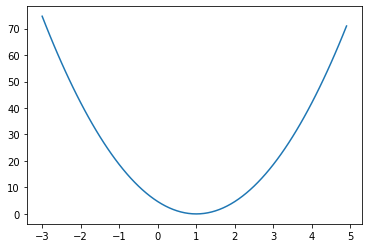

In [19]:
plt.plot(W_val, cost_val)
plt.show()

# Gradient denscent 예제

In [20]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

In [21]:
x_data = [1,2,3]
y_data = [1,2,3]

# 쓰임새 해석
- W의 값은 x축과 연관이 있고, 1에 수렴하여야 가장 최적의 값을 도출해냄

In [22]:
W = tf.Variable(tf.random.normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

###### 여기서 H(x) = X*W이고 X는 1이고 w는 상수이므로  H(x) = w가 도출됨

In [23]:
hypothesis = X * W

###### 아래 수식을 풀어서 쓰면 (H(x) -y)[제곱]한 뒤 배열의 총합이 cost 비용으로 도출됨 

In [24]:
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# 경사면을 따라 내려가게 하는 함수식
- optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
- train = optimizer.minimize(cost)을 아래와 같이 풀어쓴 것임
- tf.assing(변수, 지정 값) -> 변수 값을 지정 값으로 변경시켜주는 역할

###### (W * X - Y) * X이 수식에서 중점은 자신을 곱하기 때문에 다음 오차범위를 계산할 때 이전 값을 기준으로 천천히 하강하듯이 내려가는 게 핵심
- W*X-Y 식의 경우 오차 값이 0으로 바로 수렴
- (W*X-Y)*W의 경우 W를 기준으로 오차 값이 내려가므로 점차적으로 하강하는 곡선을 그림
- 따라서 learning_rate 값이 크면 내려가는 범위가 커지고 learning_rate 값이 작으면 내려가는 범위가 조밀해짐

In [25]:
learning_rate = 0.1
# linear의 경우 tf.reduce_mean(tf.square(W*X+b - Y))에서 끝나는데 // gradient의 경우 오차 값을 제곱하지 않고 X 값을 곱하여 수식표현
gradient = tf.reduce_mean((W * X - Y) * X)
desecent = W - learning_rate * gradient
update = W.assign(desecent)

# tf.assign 예제
- tf.assign(변수, value) -> value 값에 따라 변수 값을 초기화 해주는 함수

In [26]:
c = tf.Variable(3)
d = 3 * c

In [27]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [28]:
print(sess.run(c))
print(sess.run(d))

3
9


In [29]:
print(sess.run(tf.assign(c, c*2)))
print(sess.run(d))

6
18


# ------------------------------------- 

In [30]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [31]:
for step in range(21):
    sess.run(update, feed_dict = {X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}), sess.run(W))

0 0.96855223 [0.7369747]
1 0.2754991 [0.8597199]
2 0.078364246 [0.9251839]
3 0.022290263 [0.9600981]
4 0.0063403356 [0.978719]
5 0.0018034654 [0.98865014]
6 0.0005129911 [0.99394673]
7 0.00014591828 [0.9967716]
8 4.1503685e-05 [0.9982782]
9 1.1804398e-05 [0.99908173]
10 3.358439e-06 [0.9995102]
11 9.548783e-07 [0.9997388]
12 2.7169727e-07 [0.9998607]
13 7.716592e-08 [0.99992573]
14 2.2009562e-08 [0.99996036]
15 6.2606667e-09 [0.99997884]
16 1.7807231e-09 [0.99998873]
17 5.0953375e-10 [0.999994]
18 1.4274804e-10 [0.9999968]
19 4.2451376e-11 [0.9999983]
20 1.0874857e-11 [0.9999991]


# gradient 미세 수치 조정 예제

In [32]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

In [33]:
X = [1,2,3]
Y = [1,2,3]

In [45]:
W = tf.Variable(5.)

In [35]:
hypothesis = X * W

###### gradient 미세 조정 구간은 *2 부분인데 이를 통해서 가중치를 더 주거나 덜 줄 수 있음
- 자신을 기준으로 하는 지 다른 범위를 기준으로 하는지 미세 조정 가능 -> [(미세조정)*X] 미세조정을 통해 기준을 설정

In [36]:
gradient = tf.reduce_mean((W * X - Y) * X) * 2

In [37]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [38]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# 미세 조정 구간 

In [39]:
gvs = optimizer.compute_gradients(cost)

In [40]:
apply_gradients = optimizer.apply_gradients(gvs)

In [41]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [43]:
for step in range(100):
    print(step, sess.run([gradient, W]))
    sess.run(apply_gradients)

0 [37.333332, 5.0]
1 [33.84889, 4.6266665]
2 [30.689657, 4.2881775]
3 [27.825289, 3.981281]
4 [25.228264, 3.7030282]
5 [22.873625, 3.4507456]
6 [20.738754, 3.2220094]
7 [18.803139, 3.014622]
8 [17.04818, 2.8265905]
9 [15.457016, 2.6561089]
10 [14.014362, 2.5015388]
11 [12.706355, 2.3613951]
12 [11.520428, 2.2343316]
13 [10.445188, 2.1191273]
14 [9.470304, 2.0146754]
15 [8.586408, 1.9199723]
16 [7.78501, 1.8341082]
17 [7.058409, 1.7562581]
18 [6.3996243, 1.6856741]
19 [5.8023267, 1.6216779]
20 [5.2607765, 1.5636547]
21 [4.769771, 1.5110469]
22 [4.3245926, 1.4633492]
23 [3.9209645, 1.4201033]
24 [3.555008, 1.3808937]
25 [3.2232068, 1.3453436]
26 [2.9223745, 1.3131115]
27 [2.6496189, 1.2838877]
28 [2.4023216, 1.2573916]
29 [2.178105, 1.2333684]
30 [1.9748148, 1.2115873]
31 [1.7904993, 1.1918392]
32 [1.623386, 1.1739342]
33 [1.4718704, 1.1577004]
34 [1.3344965, 1.1429818]
35 [1.2099432, 1.1296368]
36 [1.0970153, 1.1175374]
37 [0.99462754, 1.1065673]
38 [0.90179634, 1.096621]
39 [0.81762886